In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

def create_grid(height, width, probability, dependant=False, p_prime=0.5):
    grid = np.random.rand(height, width) < probability
    
    if dependant:
        for i in range(1,height):
            for j in range(width):
                if np.random.rand() < p_prime :
                    grid[i, j] = grid[i - 1, j]
                else :
                    grid[i, j] = not grid[i - 1, j]
                    
    return grid


def simulate_flow(grid, allow_diagonal=False):
    filled_cells = np.zeros_like(grid)
    max_height_reached = 0
    stack = [] 
    for j in range(grid.shape[1]):
        if grid[0, j] == 1:
            stack.append((0, j))
    
    while stack:
        i, j = stack.pop()
        
        if i < 0 or i >= grid.shape[0] or j < 0 or j >= grid.shape[1] or grid[i, j] == 0 or filled_cells[i, j] == 1:
            continue
        
        filled_cells[i, j] = 1
        max_height_reached = max(max_height_reached, i)
        
        stack.append((i - 1, j))
        stack.append((i + 1, j))
        stack.append((i, j - 1))
        stack.append((i, j + 1))
        
        if allow_diagonal:
            stack.append((i - 1, j - 1))
            stack.append((i - 1, j + 1))
            stack.append((i + 1, j - 1))
            stack.append((i + 1, j + 1))
    
    return filled_cells, max_height_reached + 1


def visualize_flow(grid, filled_cells, height):
    plt.figure(figsize=(14, 14))

    plt.subplot(121)
    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.title('Initial Grid')

    plt.subplot(122)
    plt.imshow(filled_cells, cmap='Blues', interpolation='none')
    plt.title('Liquid Flow')
    plt.xlabel(f'Height Reached: {height}')
    plt.show()

def find_connex(grid):
    labels, num_features = label(grid)
    component_sizes = np.bincount(labels.ravel())
    component_sizes[0] = 0
    
    if len(component_sizes) > 1:
        max_component_size = np.max(component_sizes)
        avg_component_size = np.mean(component_sizes[1:])
    else:
        max_component_size = 0
        avg_component_size = 0
    
    return max_component_size, avg_component_size

def color_connex(grid):

    labeled_grid, num_features = label(grid)
    
    colors = np.random.rand(num_features + 1, 3) 
    colored_grid = np.zeros((grid.shape[0], grid.shape[1], 3))  

    for label_id in range(1, num_features + 1):
        colored_grid[labeled_grid == label_id] = colors[label_id]

    return colored_grid

def main(height, width, probability, allow_diagonal=False, dependant=True, p_prime=0.5):

    grid = create_grid(height, width, probability, dependant=dependant, p_prime=p_prime)
    inverted_grid = 1 - grid
    
    plt.figure(figsize=(15, 15))
    plt.subplot(131)
    plt.imshow(inverted_grid, cmap='binary')
    plt.title('Grille')
    plt.axis('off')
    
    filled_cells, height_reached = simulate_flow(grid, allow_diagonal)
    filled_percentage = np.sum(filled_cells) / (height * width)
    max_component_size, avg_component_size = find_connex(filled_cells)

    print(f"Profondeur atteinte: {height_reached}")
    print(f"Pourcentage de la grille rempli: {filled_percentage:.2f}")
    print(f"Taille de la plus grande composante connexe: {max_component_size}")
    print(f"Taille moyenne d'une composante connexe: {avg_component_size:.2f}")
    plt.subplot(132)
    plt.imshow(filled_cells, cmap='Blues', vmin=0, vmax=1)
    plt.title('Trajectoires de percolation')
    plt.axis('off')
    
    plt.subplot(133)
    colored_grid = color_connex(filled_cells)
    plt.imshow(colored_grid)
    plt.title('Composantes connexes lors de la percolation')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


Profondeur atteinte: 1000
Pourcentage de la grille rempli: 0.17
Taille de la plus grande composante connexe: 29325
Taille moyenne d'une composante connexe: 1470.50


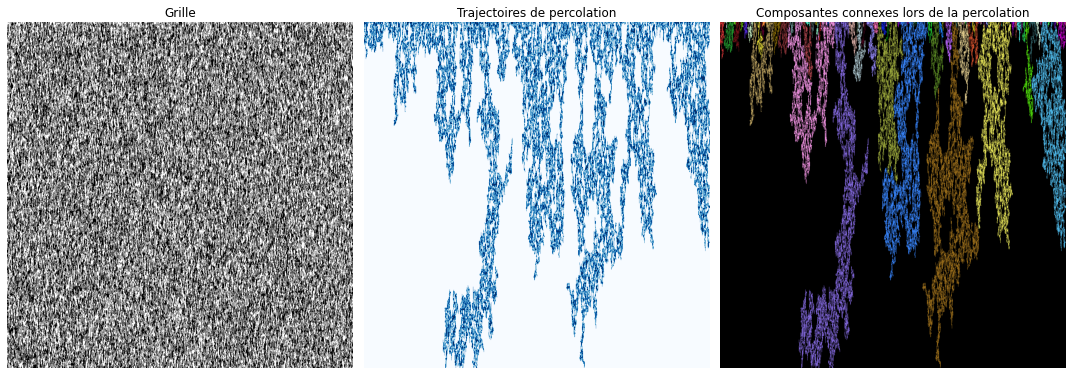

In [5]:
if __name__ == "__main__":
    height = 1000  # Hauteur de la grille
    width = 1000  # Largeur de la grille
    probability = 0.65  # Probabilité de présence initiale de liquide
    allow_diagonal = False  # Paramètre pour autoriser le mouvement diagonal
    dependant = True # Paramètre pour activer la dépendance
    p_prime=0.9  # Probabilité de dépendance
    main(height, width, probability, allow_diagonal,dependant,p_prime)

In [4]:
def percolation_probability(open_probability, num_trials, grid_size, allow_diagonal, dependant):
    percolation_count = 0
    for _ in range(num_trials):
        grid = create_grid(height, width, open_probability, dependant, open_probability)
        filled_cells, _ = simulate_flow(grid, allow_diagonal)
        if np.any(filled_cells[-1]):
            percolation_count += 1
    return percolation_count / num_trials


def plot_percolation_probability(num_trials, grid_size, allow_diagonal,dependant):
    linspace1=np.linspace(0,0.3,5)
    linspace2=np.linspace(0.3,0.6,5)
    linspace4=np.linspace(0.6,1,5)
    linspace3 = np.concatenate((linspace1, linspace2))
    open_probabilities =  np.concatenate((linspace3, linspace4))
    percolation_probabilities = []
    for open_probability in open_probabilities:
        percolation_prob = percolation_probability(open_probability, num_trials, grid_size, allow_diagonal, dependant)
        percolation_probabilities.append(percolation_prob)
    plt.figure(figsize=(10, 5))
    plt.plot(open_probabilities, percolation_probabilities)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.title('Diagramme de phase empirique')
    plt.xlabel('Probabilité d\'ouverture')
    plt.ylabel('Probabilité de percolation')
    plt.grid(True)
    plt.show()



plot_percolation_probability(5,10,False,False)

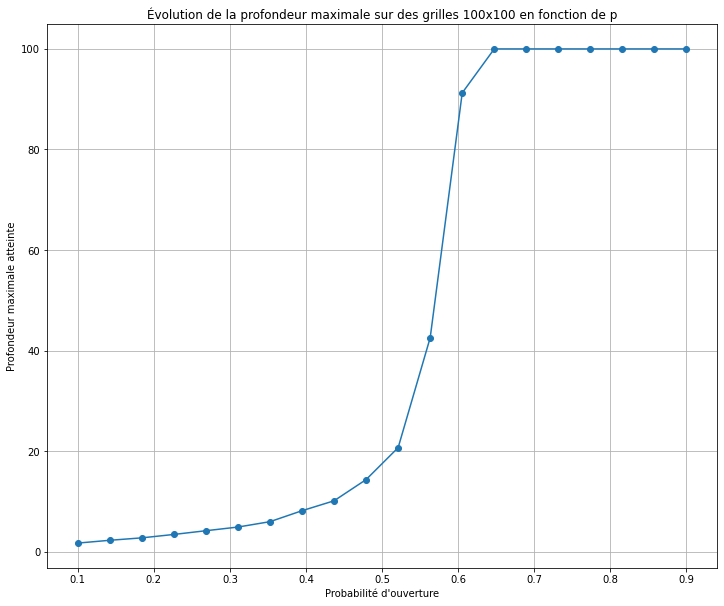

In [15]:
def plot_depth_vs_probability(height, width, probabilities, num_simulations=100, allow_diagonal=False):
    max_depths = []
    for probability in probabilities:
        max_depth_sum = 0
        for _ in range(num_simulations):
            grid = create_grid(height, width, probability)
            filled_cells, height_reached = simulate_flow(grid, allow_diagonal)
            max_depth_sum += height_reached
        max_depth_avg = max_depth_sum / num_simulations
        max_depths.append(max_depth_avg)
    
    plt.figure(figsize=(12, 10)) 
    plt.plot(probabilities, max_depths, marker='o')
    plt.xlabel('Probabilité d\'ouverture')
    plt.ylabel('Profondeur maximale atteinte')
    plt.title('Évolution de la profondeur maximale sur des grilles 100x100 en fonction de p')
    plt.grid(True)
    plt.show()

height = 100  
width = 100   
probabilities = np.linspace(0.1, 0.9, 20)  
plot_depth_vs_probability(height, width, probabilities)


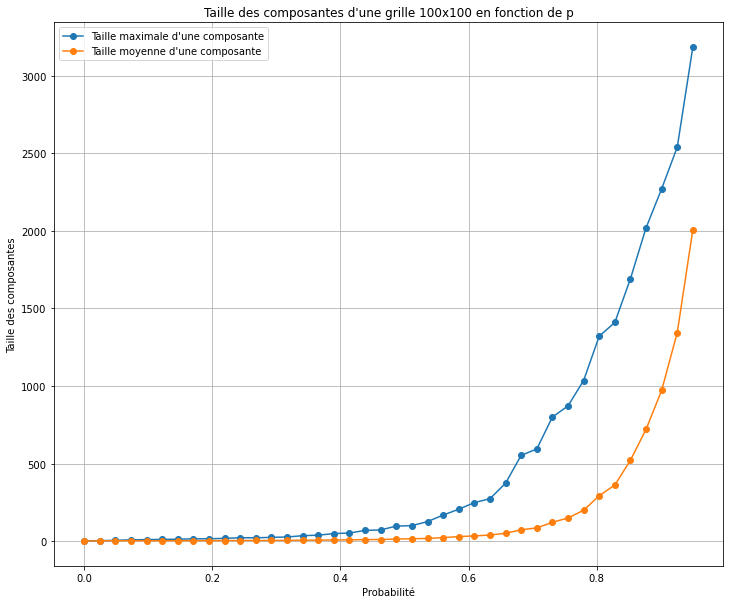

In [16]:
def plot_component_sizes_vs_probability(height, width, probabilities, num_simulations=100, allow_diagonal=False,dependant=False):
    max_component_sizes = []
    avg_component_sizes = []
    
    for probability in probabilities:
        max_size_sum = 0
        avg_size_sum = 0
        for _ in range(num_simulations):
            grid = create_grid(height, width, probability,dependant,probability)
            filled_cells, _ = simulate_flow(grid, allow_diagonal)
            max_component_size, avg_component_size = find_connex(filled_cells)
            max_size_sum += max_component_size
            avg_size_sum += avg_component_size
        
        max_component_avg = max_size_sum / num_simulations
        avg_component_avg = avg_size_sum / num_simulations
        
        max_component_sizes.append(max_component_avg)
        avg_component_sizes.append(avg_component_avg)
    
    plt.figure(figsize=(12, 10))  
    plt.plot(probabilities, max_component_sizes, marker='o', label='Taille maximale d\'une composante')
    plt.plot(probabilities, avg_component_sizes, marker='o', label='Taille moyenne d\'une composante')
    plt.xlabel('Probabilité')
    plt.ylabel('Taille des composantes')
    plt.title('Taille des composantes d\'une grille 100x100 en fonction de p')
    plt.grid(True)
    plt.legend()
    plt.savefig('test.png', dpi=300)
    plt.show()

height = 100  
width = 100  
probabilities = np.linspace(0, 0.95, 40)
plot_component_sizes_vs_probability(height, width, probabilities,100,False,True)


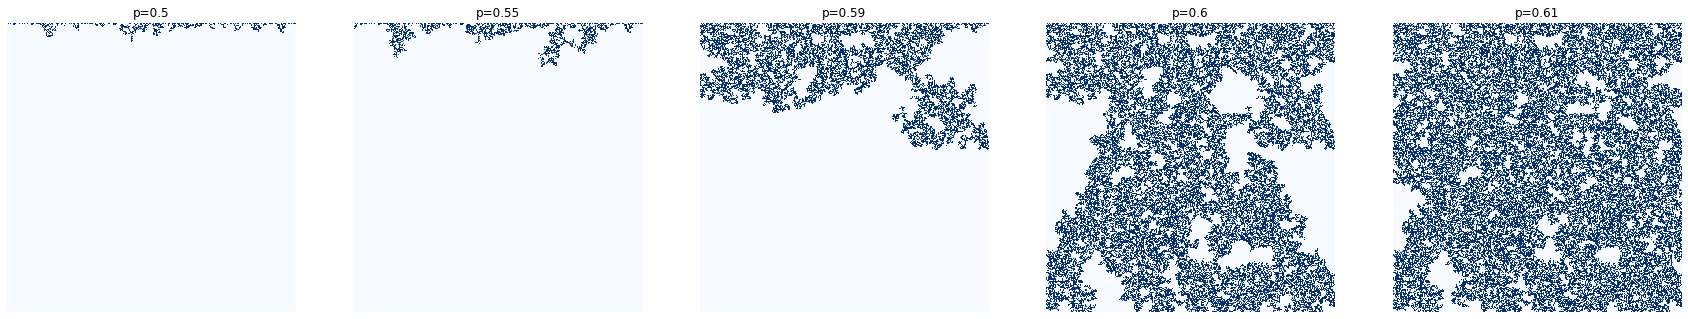

In [17]:
def evolve_graph(g1, p):
    g2 = np.zeros_like(g1)
    for i in range(g1.shape[0]):
        for j in range(g1.shape[1]):
            if g1[i, j] == 1:
                g2[i, j] = 1
            elif np.random.rand() < p:
                g2[i, j] = 1
    
    return g2


def visualize_evolution(probabilities, grid_size=500, allow_diagonal=False):
    num_graphs = len(probabilities)
    
    plt.figure(figsize=(6 * num_graphs, 6))
    
    for i, p in enumerate(probabilities, start=1):
        if i == 1:
            grid = np.random.rand(grid_size, grid_size) < p
        else:
            grid = evolve_graph(prev_grid, (p - prev_p) / (1 - prev_p))
        prev_grid = grid
        prev_p = p
        filled_cells, _ = simulate_flow(grid, allow_diagonal)

        plt.subplot(1, num_graphs, i)
        plt.imshow(filled_cells, cmap='Blues', interpolation='none')
        plt.title(f'p={p}')
        plt.axis('off')
    
    plt.show()

visualize_evolution([0.5,0.55,0.59,0.6,0.61])
